# pytorch自动求导

In [1]:
import torch
import numpy as np
from torch.autograd import Variable

## Variable

In [2]:
# 通过下面这种方式导入 Variable
from torch.autograd import Variable

In [3]:
x_tensor = torch.randn(10, 5)
y_tensor = torch.randn(10, 5)

# 将 tensor 变成 Variable
x = Variable(x_tensor, requires_grad=True) # 默认 Variable 是不需要求梯度的，所以我们用这个方式申明需要对其进行求梯度
y = Variable(y_tensor, requires_grad=True)

In [4]:
z = torch.sum(x + y)

In [5]:
print(z)

Variable containing:
 26.5895
[torch.FloatTensor of size 1]



上面我们打出了 z 中的 tensor 数值，同时通过grad_fn知道了其是通过 Sum 这种方式得到的

In [6]:
# 求 x 和 y 的梯度
z.backward()

print(x.grad)
print(y.grad)

Variable containing:
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
[torch.FloatTensor of size 10x5]

Variable containing:
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
[torch.FloatTensor of size 10x5]



通过.grad我们得到了 x 和 y 的梯度，这里我们使用了 PyTorch 提供的自动求导机制

## 自动求导小练习1

尝试构建一个函数 $y = x^2 $，然后求 x=2 的导数。

参考输出：4

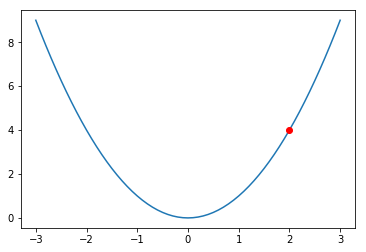

In [7]:
import matplotlib.pyplot as plt
x = np.arange(-3, 3.01, 0.1)
y = x ** 2
plt.plot(x, y)
plt.plot(2, 4, 'ro')
plt.show()

In [8]:
# 答案
x = Variable(torch.FloatTensor([-0.1]), requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)

Variable containing:
-0.2000
[torch.FloatTensor of size 1]



## 自动求导小练习2

In [9]:
x = Variable(torch.Tensor([0.5]), requires_grad=True)
y = x + 2
z = y ** 2 + 3
print(z)

Variable containing:
 9.2500
[torch.FloatTensor of size 1]



通过上面的一些列操作，我们从 x 得到了最后的结果out，我们可以将其表示为数学公式

$$
z = (x + 2)^2 + 3
$$

那么我们从 z 对 x 求导的结果就是 

$$
\frac{\partial z}{\partial x} = 2 (x + 2) = 2 (2 + 2) = 8
$$

In [10]:
# 使用自动求导
z.backward()
print(x.grad)

Variable containing:
 5
[torch.FloatTensor of size 1]



## 自动求导小练习3

In [11]:
x = Variable(torch.randn(10, 20), requires_grad=True)
w = Variable(torch.randn(20, 5), requires_grad=True)
y = Variable(torch.randn(10, 5), requires_grad=True)

out = torch.mean(y - torch.matmul(x, w)) # torch.matmul 是做矩阵乘法
out.backward()

In [12]:
# 得到 x 的梯度
print(x.grad)

Variable containing:

Columns 0 to 9 
1.00000e-02 *
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267
 -3.1071  3.4431 -6.4533  0.6355 -5.4629  6.3851 -5.1077 -0.7437 -8.3512  2.9267

Columns 10 to 19 
1.00000e-02 *
  1.4607 -3.6433 -8.0926  1.8471  1.6326 -6.3616 -6.6073  2.7591  8.5558 -1.0111
  1.4607 -3.6433 -8.0926

In [13]:
# 得到 y 的的梯度
print(y.grad)

Variable containing:
1.00000e-02 *
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
  2.0000  2.0000  2.0000  2.0000  2.0000
[torch.FloatTensor of size 10x5]



In [14]:
# 得到 w 的梯度
print(w.grad)

Variable containing:
-0.1445 -0.1445 -0.1445 -0.1445 -0.1445
-0.0119 -0.0119 -0.0119 -0.0119 -0.0119
 0.0579  0.0579  0.0579  0.0579  0.0579
 0.0722  0.0722  0.0722  0.0722  0.0722
 0.0389  0.0389  0.0389  0.0389  0.0389
-0.0200 -0.0200 -0.0200 -0.0200 -0.0200
-0.0697 -0.0697 -0.0697 -0.0697 -0.0697
-0.0382 -0.0382 -0.0382 -0.0382 -0.0382
 0.0302  0.0302  0.0302  0.0302  0.0302
-0.1226 -0.1226 -0.1226 -0.1226 -0.1226
-0.0114 -0.0114 -0.0114 -0.0114 -0.0114
-0.0451 -0.0451 -0.0451 -0.0451 -0.0451
 0.0299  0.0299  0.0299  0.0299  0.0299
-0.0640 -0.0640 -0.0640 -0.0640 -0.0640
-0.0089 -0.0089 -0.0089 -0.0089 -0.0089
-0.0157 -0.0157 -0.0157 -0.0157 -0.0157
 0.0464  0.0464  0.0464  0.0464  0.0464
-0.0474 -0.0474 -0.0474 -0.0474 -0.0474
 0.0091  0.0091  0.0091  0.0091  0.0091
 0.0513  0.0513  0.0513  0.0513  0.0513
[torch.FloatTensor of size 20x5]

